In [9]:
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns

In [10]:
df_fb_ads = pd.read_csv ('/Users/elena/Desktop/Goit Data Analysis/facebook_ads_data (2.0).csv')

In [11]:
df_fb_ads

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [12]:
df_fb_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [13]:
df_fb_ads.describe()

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
mean,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
std,214.968986,44433.507387,485.663099,274.764573,1.705224,8.107076,0.013192,0.343012
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423
max,2035.490000,456481.000000,6199.000000,2562.600000,24.790000,114.150000,0.159223,2.486911


1. Group data by day and calculate daily metrics.
Create two plots for the year 2021:
Daily Advertising Spend: a line chart showing the sum of daily ad spend.
Daily ROMI: a line chart showing daily ROMI (Return on Marketing Investment).
Bonus (optional): use the rolling() method to calculate and display a moving average for both daily ad spend and daily ROMI.

In [14]:
##Before creating the plots, group the data by day:
df_fb_ads['ad_date'] = pd.to_datetime(df_fb_ads['ad_date'])
df_daily = (df_fb_ads.groupby('ad_date', as_index=False)['total_spend'].sum())
df_daily.head()

,ad_date,total_spend
0,2020-11-11,1.89
1,2020-11-12,23.00
2,2020-11-13,6.36
3,2020-11-14,7.27
4,2020-11-15,6.98


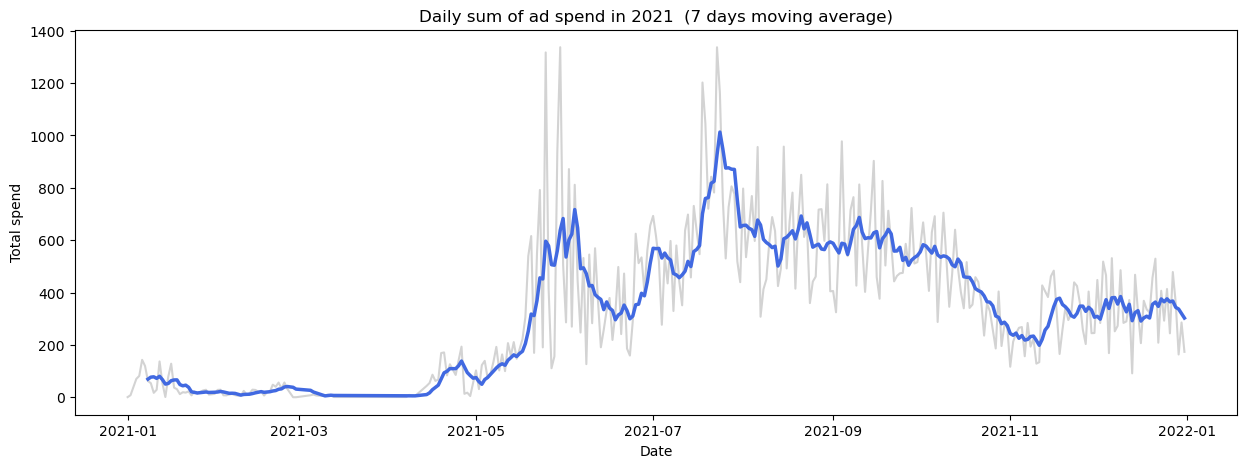

In [15]:
##Now we can build a chart with the daily sum of advertising expenses in 2021:
df_daily_2021 = df_daily[df_daily['ad_date'].dt.year == 2021].copy()
df_daily_2021['rolling_spend'] = df_daily_2021['total_spend'].rolling(window=7).mean()
plt.figure(figsize=(15, 5))
plt.title('Daily sum of ad spend in 2021  (7 days moving average)')
plt.xlabel('Date')
plt.ylabel('Total spend')
plt.plot(df_daily_2021['ad_date'], df_daily_2021['total_spend'], color='lightgray', label='Raw data')
plt.plot(df_daily_2021['ad_date'], df_daily_2021['rolling_spend'], color='royalblue', linewidth=2.5, label='7 days moving average')

On this chart, we can see the dynamics of daily advertising expenses (gray line), as well as the dynamics of advertising expenses using a 7-day moving average (blue line). The moving average helps to more clearly observe the trend and smooth out spikes on individual days. In this case, we generally see an upward trend; however, at the end of 2021, there was a period of decline, which is more likely related to a change in the company’s marketing strategy or seasonality.

In [16]:
##Next, we will create a dataframe with grouped expenses, impressions, clicks, and advertising revenue to calculate the metrics:
grouped_df = df_fb_ads.groupby('ad_date')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum().reset_index()
grouped_df

,ad_date,total_spend,total_impressions,total_clicks,total_value
0,2020-11-11,1.89,1800,45,2.38
1,2020-11-12,23.00,10473,397,21.13
2,2020-11-13,6.36,11669,451,9.77
3,2020-11-14,7.27,5005,392,12.67
4,2020-11-15,6.98,12465,657,10.96
...,...,...,...,...,...
542,2022-10-29,714.03,33358,115,680.34
543,2022-10-30,335.91,27562,69,472.61
544,2022-10-31,227.45,6054,58,191.87
545,2022-11-01,0.00,0,0,0.00


In [17]:
##We calculate the metrics for the new table with data grouped by day: 
grouped_df['cpc']=grouped_df['total_spend']/grouped_df['total_clicks']
grouped_df['cpm']=(grouped_df['total_spend']/grouped_df['total_impressions'])*1000
grouped_df['romi']=grouped_df['total_value']/grouped_df['total_spend']
grouped_df['ctr']=grouped_df['total_clicks']/grouped_df['total_impressions']
grouped_df

,ad_date,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,romi,ctr
0,2020-11-11,1.89,1800,45,2.38,0.042000,1.050000,1.259259,0.025000
1,2020-11-12,23.00,10473,397,21.13,0.057935,2.196123,0.918696,0.037907
2,2020-11-13,6.36,11669,451,9.77,0.014102,0.545034,1.536164,0.038649
3,2020-11-14,7.27,5005,392,12.67,0.018546,1.452547,1.742779,0.078322
4,2020-11-15,6.98,12465,657,10.96,0.010624,0.559968,1.570201,0.052708
...,...,...,...,...,...,...,...,...,...
542,2022-10-29,714.03,33358,115,680.34,6.208957,21.405060,0.952817,0.003447
543,2022-10-30,335.91,27562,69,472.61,4.868261,12.187432,1.406954,0.002503
544,2022-10-31,227.45,6054,58,191.87,3.921552,37.570202,0.843570,0.009580
545,2022-11-01,0.00,0,0,0.00,NaN,NaN,NaN,NaN


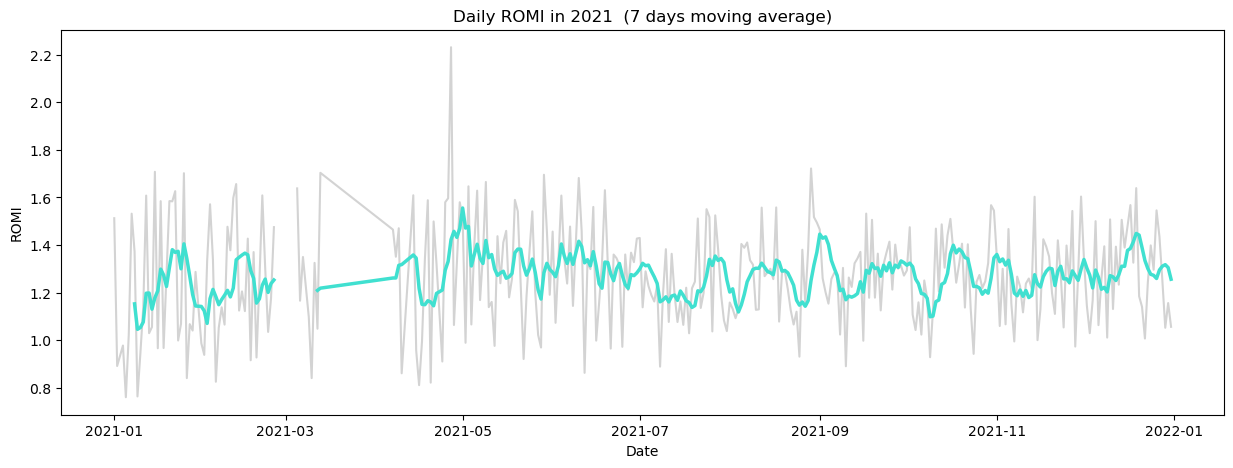

In [18]:
##We build a chart of daily ROMI values for 2021 using a moving average:
df_daily_2021 = grouped_df[grouped_df['ad_date'].dt.year == 2021].copy()
df_daily_2021['rolling_romi'] = df_daily_2021['romi'].rolling(window=7).mean()
plt.figure(figsize=(15, 5))
plt.title('Daily ROMI in 2021  (7 days moving average)')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.plot(df_daily_2021['ad_date'], df_daily_2021['romi'], color='lightgray', label='Raw data')
plt.plot(df_daily_2021['ad_date'], df_daily_2021['rolling_romi'], color='turquoise', linewidth=2.5, label='7 days moving average')

For the ROMI demonstration, we also take a moving average to smooth out extremes. We can see that throughout 2021, ROMI fluctuates within a certain range, showing no clear trend of increase or decrease. Depending on the context, this may indicate product stability and budget predictability in the future, or it may be a sign of business "stagnation" or the use of outdated marketing approaches.

2. Group the data by campaign name and build two charts:

A chart of the total advertising expenses for each campaign;

A chart of the total ROMI for each campaign.

In [19]:
##First, we group the data by campaign name
campaign_df = df_fb_ads.groupby('campaign_name')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum().reset_index()
campaign_df

,campaign_name,total_spend,total_impressions,total_clicks,total_value
0,Brand,539.92,893854,542,670.15
1,Crazy discounts,2175.29,1401511,19627,2583.59
2,Discounts,2856.39,1256069,33353,3516.27
3,Electronics,23920.42,7070770,51593,29169.38
4,Expansion,67212.82,3736092,37469,83288.66
5,Hobbies,11326.97,8146187,50611,13974.63
6,Lookalike,63631.09,21019388,220993,80234.70
7,New items,2936.97,1045294,16935,3742.05
8,Promos,4993.84,2216422,17315,8793.77
9,Trendy,1992.31,1392189,9725,3798.90


<BarContainer object of 11 artists>

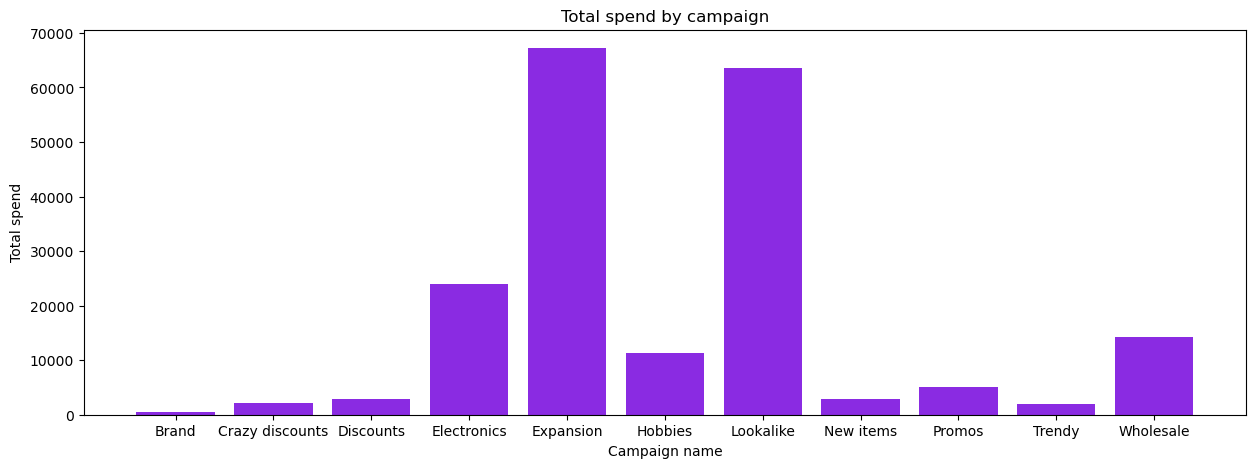

In [20]:
##We build a chart of the total advertising expenses for each campaign
plt.figure(figsize=(15, 5))
plt.title('Total spend by campaign')
plt.xlabel('Campaign name')
plt.ylabel('Total spend')
plt.bar(campaign_df['campaign_name'], campaign_df['total_spend'], color='blueviolet') ##спочатку побудувала графік через Matplotlib

<Axes: title={'center': 'Total spend by campaign'}, xlabel='Campaign name', ylabel='Total spend'>

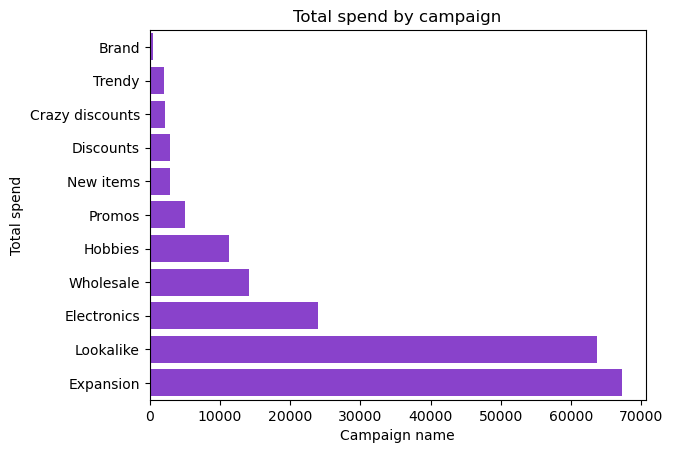

In [21]:
##Next, I tried using Seaborn with sorting applied directly when building the chart
plt.title('Total spend by campaign')
plt.xlabel('Campaign name')
plt.ylabel('Total spend')
sns.barplot(data=campaign_df.sort_values('total_spend'), y ='campaign_name', x = 'total_spend', color='blueviolet')

So, the previous chart shows that Brand campaign has the lowest expenses, and Expansion has the highest expenses. Most likely, the company is entering new markets, thus attracting new customers. In my opinion, the metrics ROMI, CPC, CPM, and CTR are still more indicative (although depending on the goal).

In [22]:
campaign_df['cpc']=campaign_df['total_spend']/campaign_df['total_clicks']
campaign_df['cpm']=(campaign_df['total_spend']/campaign_df['total_impressions'])*1000
campaign_df['romi']=campaign_df['total_value']/campaign_df['total_spend']
campaign_df['ctr']=campaign_df['total_clicks']/campaign_df['total_impressions']
campaign_df

,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,romi,ctr
0,Brand,539.92,893854,542,670.15,0.996162,0.604036,1.241202,0.000606
1,Crazy discounts,2175.29,1401511,19627,2583.59,0.110832,1.552103,1.187699,0.014004
2,Discounts,2856.39,1256069,33353,3516.27,0.085641,2.274071,1.231019,0.026553
3,Electronics,23920.42,7070770,51593,29169.38,0.463637,3.383001,1.219434,0.007297
4,Expansion,67212.82,3736092,37469,83288.66,1.793825,17.990140,1.239178,0.010029
5,Hobbies,11326.97,8146187,50611,13974.63,0.223805,1.390463,1.233748,0.006213
6,Lookalike,63631.09,21019388,220993,80234.70,0.287933,3.027257,1.260935,0.010514
7,New items,2936.97,1045294,16935,3742.05,0.173426,2.809707,1.274119,0.016201
8,Promos,4993.84,2216422,17315,8793.77,0.288411,2.253109,1.760923,0.007812
9,Trendy,1992.31,1392189,9725,3798.90,0.204865,1.431063,1.906782,0.006985


<BarContainer object of 11 artists>

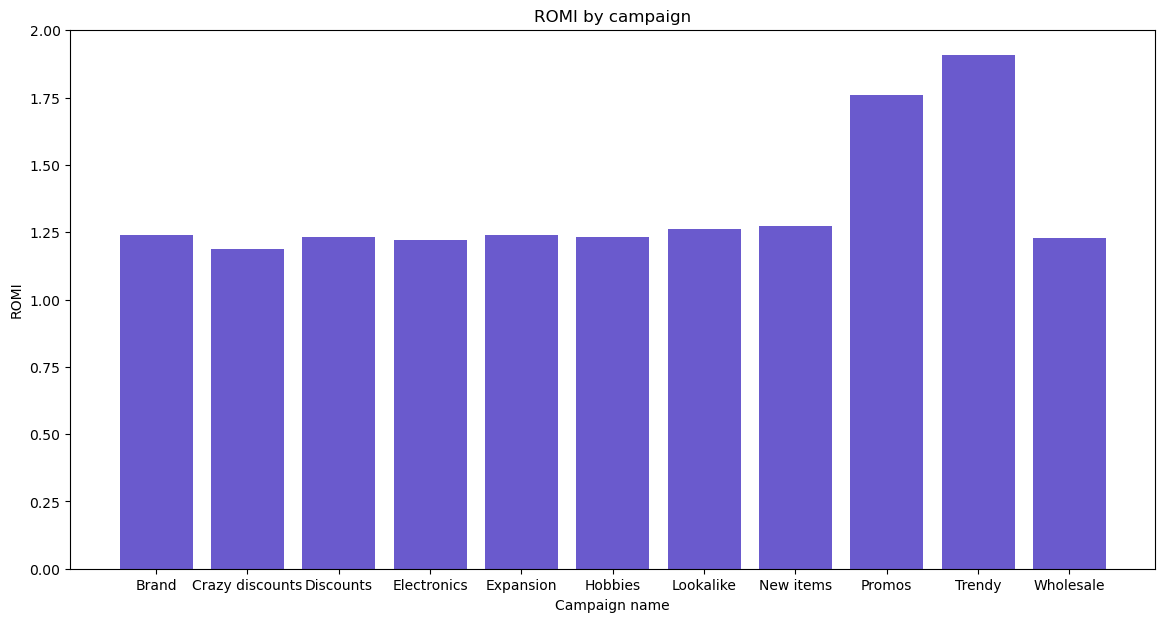

In [23]:
##We build a chart of the total ROMI for each campaign:
plt.figure(figsize=(14, 7))
plt.title('ROMI by campaign')
plt.xlabel('Campaign name')
plt.ylabel('ROMI')
plt.bar(campaign_df['campaign_name'], campaign_df['romi'], color='slateblue')

The Promos and Trendy campaigns are the most successful among the others, as they have the highest ROMI values (around 2). This means that the expenses for these campaigns were not only recovered, but a profit of the same amount was also gained. Other campaigns were also profitable, but not as successful.

3. Using a box plot, determine the range of daily ROMI for each campaign (by campaign name).

Text(0.5, 1.0, 'Variability of ROMI by campaign')

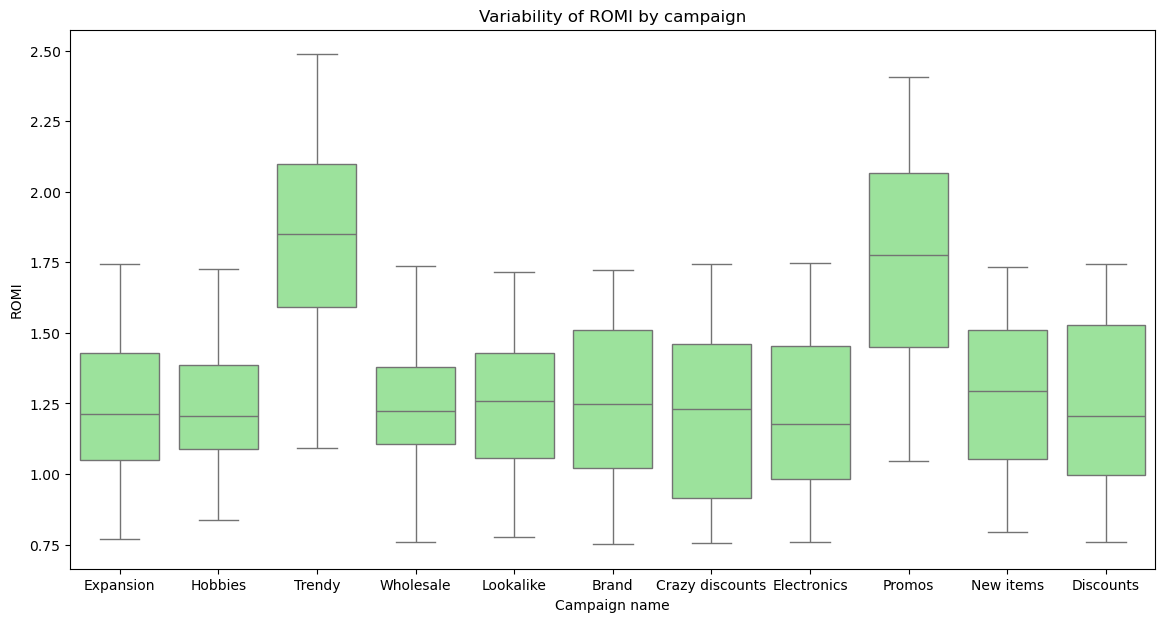

In [24]:
plt.figure(figsize=(14, 7))
plt.xlabel('Campaign name')
plt.ylabel('ROMI')
sns.boxplot(data=df_fb_ads, x='campaign_name', y='romi',color='lightgreen').set_title('Variability of ROMI by campaign')

We can see that the greatest variability is for the Promos and Trendy campaigns (which also show the highest ROMI values). Thus, these two campaigns have a higher potential for profit, but also a higher level of risk. The Wholesale campaign can be considered the most predictable. This should be taken into account depending on the business’s priorities and goals.

4. Build a histogram showing the distribution of ROMI values in the table facebook_ads_data.csv

Text(0.5, 1.0, 'Distribution histogram of ROMI')

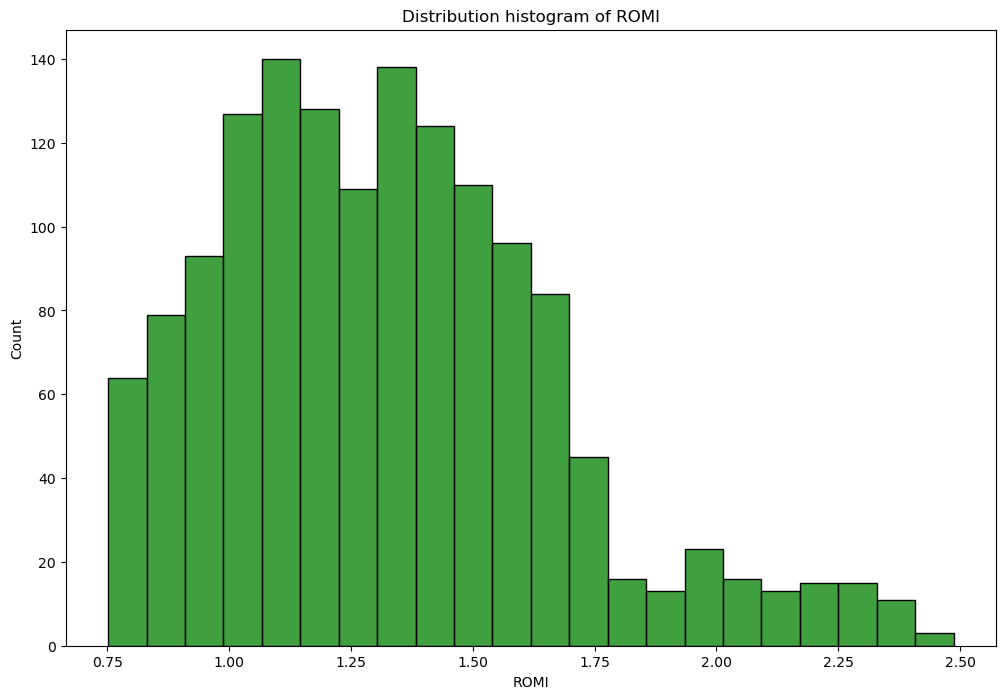

In [25]:
plt.figure(figsize=(12, 8))
plt.xlabel('ROMI')
sns.histplot(data=df_fb_ads, x='romi',color='green').set_title('Distribution histogram of ROMI')

The histogram of ROMI distribution shows that on most days this metric falls within the 1–1.5 range, which is considered successful. Visually, the histogram is asymmetric because there are campaigns in which ROMI reached higher values on certain days. However, considering that the median and mean are close to each other, we can call this distribution nearly symmetric.

5. Build a heatmap of correlations among all numerical metrics in the table facebook_ads_data.csv. Which metrics have the highest and lowest correlation? What does total_value correlate with?

<Axes: >

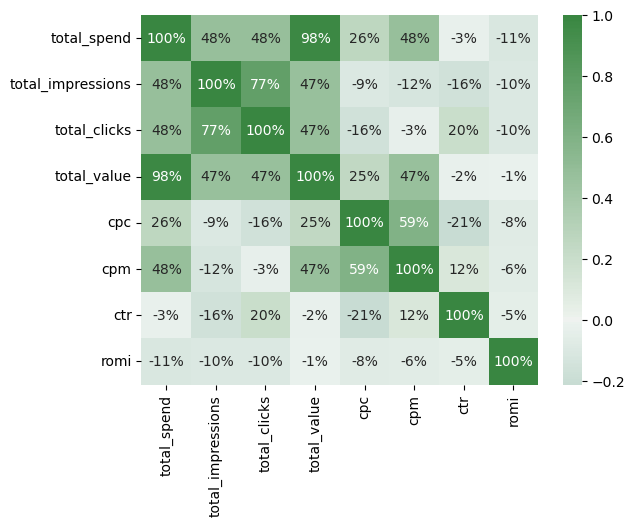

In [26]:
cmap= sns.diverging_palette(150,850, as_cmap=True)
sns.heatmap(df_fb_ads.corr(numeric_only=True), annot = True, fmt = '.0%', cmap = cmap, center = 0)

The highest correlation is between the spend and value metrics. This may indicate that the marketing campaigns are working effectively and have potential for scaling. The lowest positive correlation can be seen between spend and CPC, meaning that increasing advertising expenses does not affect the CPC metric. The value metric also moderately correlates with impressions, clicks, and CPM. Thus, as user activity increases, the company’s profit also rises. The relationship is moderate, so other factors also influence profit. Therefore, simply increasing impressions and clicks is not enough to boost profit; campaigns and content need to be optimized.

6. Build a scatter plot with a linear regression line (for this, you can use the lmplot() function) based on the data from total_spend and total_value to visualize the relationship between these variables.

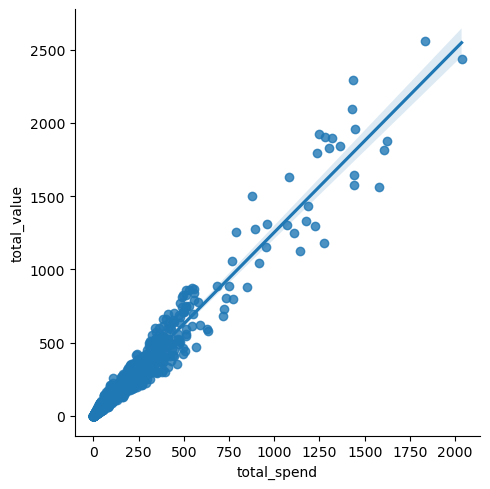

In [27]:
sns.lmplot(data=df_fb_ads, x='total_spend', y='total_value')

This scatter plot confirms a strong relationship (98%) between spend and profit. We can see a clear linear relationship. In certain contexts, this plot can also be used to investigate the presence of outliers (none are observed here), identify problematic areas for further optimization, and highlight growth opportunities.